# Market Basket Analysis

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../Data/Reservaciones.csv')
df['Fecha_hoy'] = pd.to_datetime(df['Fecha_hoy'])

# Drop columnas 'Franquicia', 'Empresa_nombre', 'Hotel_cve' y 'moneda_cve'
df.drop(columns=['Franquicia', 'Empresa_nombre', 'Hotel_cve', 'moneda_cve'], inplace=True)

In [8]:
# Transformar variables a 'items'
# --- TRANSFORMACIÓN DE VARIABLES A "ITEMS" ---
df['mes'] = 'mes_' + df['Fecha_hoy'].dt.month_name()
df['con_menores'] = df['h_num_men'].apply(lambda x: 'menores' if x > 0 else 'sin_menores')
df['num_adultos'] = 'adu_' + df['h_num_adu'].astype(str)
df['num_noches'] = df['h_num_noc'].apply(lambda x: 'estancia_corta' if x <= 2 else 'estancia_larga')
df['tipo_hab'] = 'hab_' + df['Tipo_Habitacion_nombre'].astype(str)
df['origen'] = 'pais_' + df['ID_Pais_Origen'].astype(str)
df['estado_res'] = 'edo_' + df['h_edo'].astype(str)
df['clasificacion'] = 'clas_' + df['Clasificacion'].astype(str)
df['paquete'] = 'paq_' + df['Paquete_nombre'].fillna("sin_paquete").astype(str)

# Combinar todos los ítems relevantes
df['itemset'] = df[['mes', 'con_menores', 'num_adultos', 'num_noches',
                    'tipo_hab', 'origen', 'estado_res', 'clasificacion', 'paquete']].values.tolist()

c:\Users\aesca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aesca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aesca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


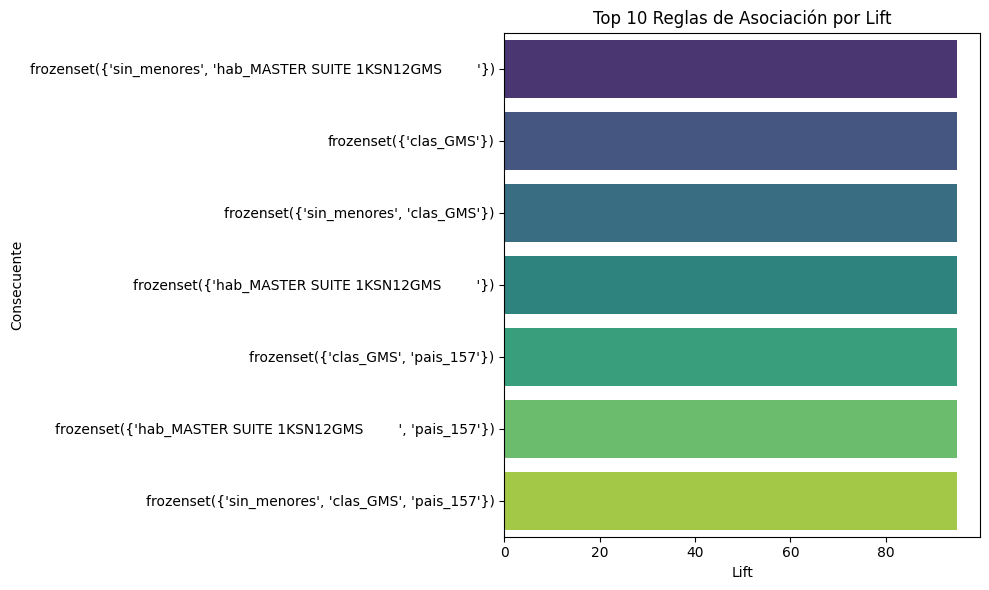

In [9]:
### Convertir a formato trasaccional
transactions = df['itemset'].tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

### Aplicación del algoritmo Apriori
frequent_itemsets = apriori(df_transformed, min_support=0.01, use_colnames=True)

### Generación de reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

### Visualizar las top 10 reglas
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rules, x='lift', y=top_rules['consequents'].astype(str), palette='viridis')
plt.title('Top 10 Reglas de Asociación por Lift')
plt.xlabel('Lift')
plt.ylabel('Consecuente')
plt.tight_layout()
plt.show()